<a href="https://colab.research.google.com/github/SaeidAbdolian/Mini-projects-of-images-processing/blob/main/Gaossian-filter/Gaussian_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gaussian_Filter**

In image processing, a Gaussian filter(also known as Gaussian smoothing or Gaussian blur) is the result of blurring an image by a Gaussian function (named after mathematician and scientist Carl Friedrich Gauss).

It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. The visual effect of this blurring technique is a smooth blur resembling that of viewing the image through a translucent screen, distinctly different from the bokeh effect produced by an out-of-focus lens or the shadow of an object under usual illumination.

Gaussian_Filter is also used as a pre-processing stage in computer vision algorithms in order to enhance image structures at different scales—see scale space representation and scale space implementation.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
!wget "https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg" -O AMOL_IRAN.jpg

--2020-11-19 19:35:03--  https://i.pinimg.com/originals/46/36/d3/4636d34f40f37a4bf056bd373e25afd4.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.193.24.222, 2600:1417:76:49d::1931, 2600:1417:76:4a2::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.193.24.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142536 (139K) [image/jpeg]
Saving to: ‘AMOL_IRAN.jpg’

AMOL_IRAN.jpg       100%[===================>] 139.20K  --.-KB/s    in 0.008s  

2020-11-19 19:35:04 (16.1 MB/s) - ‘AMOL_IRAN.jpg’ saved [142536/142536]



If your image has 3 dimention [x,y,z] so [img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)] make image from RGB to GRAY that means img.shape=2dimention[x,y] 




In [13]:
img = cv.imread('./AMOL_IRAN.jpg')
if len(img.shape) == 3:
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = np.array(img)

In [6]:
def gaussianKern(w, s):
    x = np.arange(0, w, 1, float)
    y = x[:, np.newaxis]
    x = x - w/2
    y = y - w/2
    gausKern = np.exp(-((x * x + y * y)/ (2. * s * s)))
    return gausKern / np.sum(gausKern)

fltr = gaussianKern(5, 3)

In [7]:
shape = img.shape
output = np.zeros((shape[0], shape[1]), dtype='uint8')
win = fltr.shape[0]
for i in range(0, shape[0]):
    for j in range(0, shape[1]):
        if i <= int(win/2) or shape[0]-i <= int(win/2) or j <= int(win/2) or shape[1]-j <= int(win/2):
            continue
        kernel = img[i-int(win/2):i+int(win/2)+1, j-int(win/2):j+int(win/2)+1]              
        output[i, j] = np.sum(np.multiply(kernel, fltr))

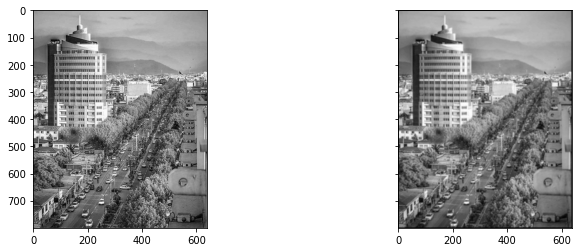

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (12,4))
ax1.imshow(img, cmap='gray')
ax2.imshow(output, cmap='gray')
plt.show()

Although you can use ready toolbox to gaussian filter and etc. but we are showing that how is gaussian filter process with kernel.

Have a good time.